In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [7]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.8260.jpg', 'cat.5557.jpg', 'cat.5237.jpg', 'cat.11661.jpg', 'dog.2330.jpg', 'cat.1931.jpg', 'dog.8506.jpg', 'cat.242.jpg', 'cat.3350.jpg', 'dog.1344.jpg', 'dog.10170.jpg', 'dog.9636.jpg', 'cat.12257.jpg', 'cat.3346.jpg', 'dog.10942.jpg', 'dog.10222.jpg', 'dog.1637.jpg', 'cat.6633.jpg', 'dog.12319.jpg', 'cat.1368.jpg', 'cat.9395.jpg', 'dog.12306.jpg', 'cat.3443.jpg', 'dog.10458.jpg', 'dog.2137.jpg', 'cat.8960.jpg', 'cat.801.jpg', 'cat.5619.jpg', 'cat.11360.jpg', 'dog.2205.jpg', 'cat.3020.jpg', 'dog.8502.jpg', 'cat.11156.jpg', 'cat.2319.jpg', 'dog.8518.jpg', 'dog.7018.jpg', 'dog.8806.jpg', 'dog.7785.jpg', 'cat.3027.jpg', 'dog.11239.jpg', 'dog.12493.jpg', 'dog.529.jpg', 'cat.3736.jpg', 'cat.97.jpg', 'cat.2847.jpg', 'cat.5402.jpg', 'cat.1034.jpg', 'dog.3445.jpg', 'cat.4016.jpg', 'dog.10927.jpg', 'cat.4569.jpg', 'cat.8153.jpg', 'cat.264.jpg', 'cat.3024.jpg', 'cat.8251.jpg', 'cat.9183.jpg', 'cat.402.jpg', 'dog.10673.jpg', 'dog.5456.jpg', 'cat.2006.jpg', 'dog.8875.jpg', 'cat.10687.jpg',

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


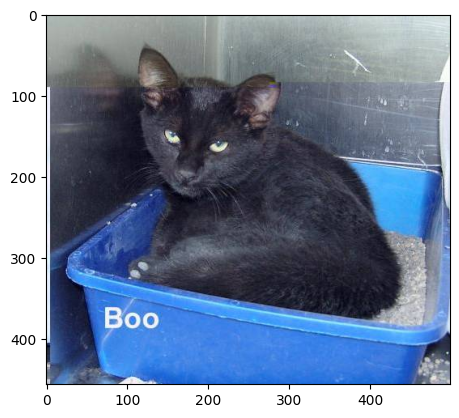

In [9]:
img = mpimg.imread('/content/train/cat.11784.jpg')
imgplt = plt.imshow(img)
plt.show()

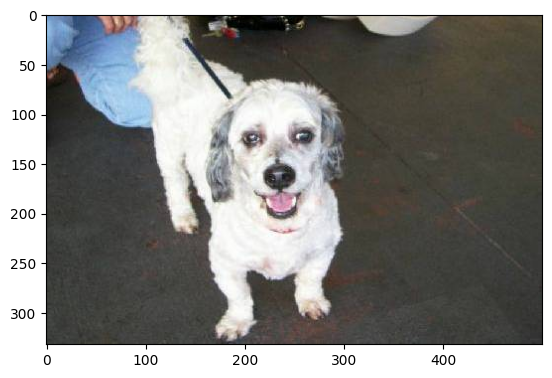

In [10]:
img = mpimg.imread('/content/train/dog.3169.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
dog


In [12]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Number of dog images: ' ,dog_count)
print('Number of cat images: ' ,cat_count)

Number of dog images:  12500
Number of cat images:  12500


In [13]:
os.mkdir('/content/image resized3')

In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized3/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

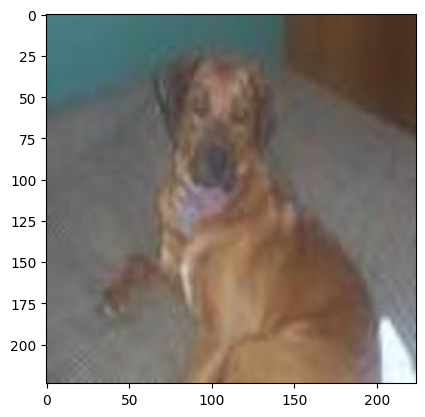

In [15]:
img = mpimg.imread('/content/image resized3/dog.316.jpg')
imgplt = plt.imshow(img)
plt.show()

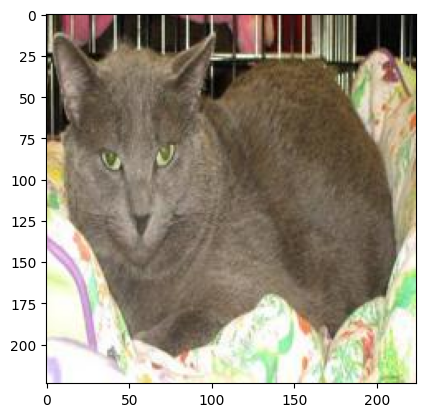

In [16]:
img = mpimg.imread('/content/image resized3/cat.316.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
filenames = os.listdir('/content/image resized3')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [18]:
print(filenames[0:5])
print(len(filenames))

['cat.8260.jpg', 'cat.5557.jpg', 'cat.5237.jpg', 'cat.11661.jpg', 'dog.2330.jpg']
2000


In [19]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 1]
2000


In [20]:
values, count = np.unique(labels, return_counts=True)
print(values)
print(count)


[0 1]
[1003  997]


In [21]:
import cv2
import glob

In [22]:
image_directory = '/content/image resized3/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [23]:
print(dog_cat_images)

[[[[ 16  23  20]
   [ 13  20  17]
   [ 12  19  16]
   ...
   [153 136 145]
   [151 134 143]
   [149 132 141]]

  [[ 20  26  25]
   [ 16  22  21]
   [ 16  22  21]
   ...
   [153 136 145]
   [151 134 143]
   [149 132 141]]

  [[ 21  26  29]
   [ 17  22  25]
   [ 17  22  25]
   ...
   [152 137 145]
   [150 135 143]
   [148 133 141]]

  ...

  [[114  91  83]
   [130 107  99]
   [145 124 116]
   ...
   [144 133 141]
   [145 134 142]
   [144 133 141]]

  [[ 97  74  66]
   [118  95  87]
   [137 116 108]
   ...
   [145 134 142]
   [146 135 143]
   [146 135 143]]

  [[ 85  62  54]
   [111  88  80]
   [133 112 104]
   ...
   [146 135 143]
   [147 136 144]
   [148 137 145]]]


 [[[ 41  40  56]
   [ 42  41  57]
   [ 42  42  60]
   ...
   [ 34  33  43]
   [ 34  32  44]
   [ 34  32  44]]

  [[ 39  38  54]
   [ 40  39  55]
   [ 40  38  57]
   ...
   [ 34  33  43]
   [ 34  32  44]
   [ 34  32  44]]

  [[ 42  38  57]
   [ 40  38  57]
   [ 40  38  58]
   ...
   [ 34  32  44]
   [ 34  32  44]
   [ 34  32

In [24]:
type(dog_cat_images)

numpy.ndarray

In [25]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [26]:
X = dog_cat_images
Y = np.asarray(labels)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
print(X_train_scaled)

[[[[0.17647059 0.16470588 0.17254902]
   [0.17647059 0.16470588 0.17254902]
   [0.17254902 0.16078431 0.16862745]
   ...
   [0.12156863 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]]

  [[0.17647059 0.16470588 0.17254902]
   [0.17647059 0.16470588 0.17254902]
   [0.17647059 0.16470588 0.17254902]
   ...
   [0.12156863 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]]

  [[0.17647059 0.16470588 0.17254902]
   [0.17647059 0.16470588 0.17254902]
   [0.16862745 0.16470588 0.17254902]
   ...
   [0.12156863 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]
   [0.12941176 0.12941176 0.12941176]]

  ...

  [[0.29411765 0.29411765 0.29411765]
   [0.2745098  0.2745098  0.2745098 ]
   [0.25098039 0.25098039 0.25098039]
   ...
   [0.99215686 1.         0.99607843]
   [0.99215686 1.         0.99607843]
   [0.99215686 1.         0.99607843]]

  [[0.27058824 0.27058824 0.27058824]
   [0.2

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [33]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [35]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 8s 39ms/step - loss: 0.1752 - acc: 0.9356
Epoch 2/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0641 - acc: 0.9806
Epoch 3/5
50/50 [==============================] - 2s 43ms/step - loss: 0.0465 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 2s 43ms/step - loss: 0.0392 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 2s 46ms/step - loss: 0.0296 - acc: 0.9956


In [36]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test loss = ', score)
print('Test accuracy = ', acc)

13/13 [==============================] - 2s 111ms/step - loss: 0.0490 - acc: 0.9825
Test loss =  0.049010928720235825
Test accuracy =  0.9825000166893005


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize / 255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a CAT')
else:
  print('The image represents a DOG')

Path of the image to be predicted: /content/cat.jpg
1/1 [==============================] - 0s 30ms/step
The image represents a CAT


In [51]:
import random

cats_folder = '/content/train/'

# Cats klasöründeki tüm dosyaların listesi
cat_files = os.listdir(cats_folder)

# Dosya isimlerini karıştır
random.shuffle(cat_files)

# Cats klasöründeki her bir dosyanın tam yolu
cat_paths = [os.path.join(cats_folder, cat_file) for cat_file in cat_files]

count = 0
# Dosyaların sırasıyla erişmek için bir örnek
for cat_path in cat_paths:
    ## print(cat_path)
    test_img = cv2.imread(cat_path)
    test_img = cv2.resize(test_img, (224, 224))
    test_img_scaled = test_img / 255
    test_img_reshaped = np.reshape(test_img_scaled, [1,224,224,3])
    predict = model.predict(test_img_reshaped)
    input_pred_label = np.argmax(predict)
    if input_pred_label == 0:
      ##print('The image represents a CAT')
      if('dog' in cat_path):
        print("Wrong", cat_path)
        count += 1
    else:
      ##print('The image represents a DOG')
      if('cat' in cat_path):
        print("Wrong", cat_path)
        count += 1
print(count)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 22ms/step
Wrong /content/train/cat.5472.jpg
1/1 [==============================] - 0s 20ms/step
Wrong /content/train/dog.3655.jpg
1/1 [==============================] - 0s 21ms/step
Wrong /content/train/dog.5959.jpg
1/1 [==============================] - 0s 23ms/step
Wrong /content/train/cat.6393.jpg
1/1 [==============================] - 0s 21ms/step
Wrong /content/train/dog.2973.jpg
1/1 [==============================] - 0s 22ms/step
Wrong /content/train/cat.9250.jpg
1/1 [==============================] - 0s 30ms/step
Wrong /content/train/dog.7716.jpg
1/1 [==============================] - 0s 33ms/step
Wrong /content/train/dog.1196.jpg
1/1 [==============================] - 0s 22ms/step
Wrong /content/train/dog.8132.jpg
1/1 [==============================] - 0s 21ms/step
Wrong /content/train/cat.1423.jpg
1/1 [==============================] - 0s 46ms/step
Wrong /content/train/cat.11191.jpg
1/1 [=

KeyboardInterrupt: 

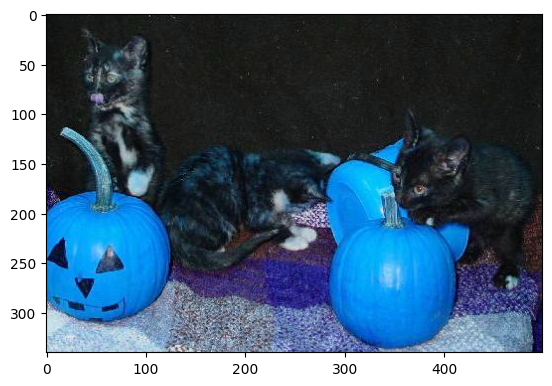

In [59]:
img = cv2.imread('/content/train/cat.824.jpg')
imgplt = plt.imshow(img)
plt.show()

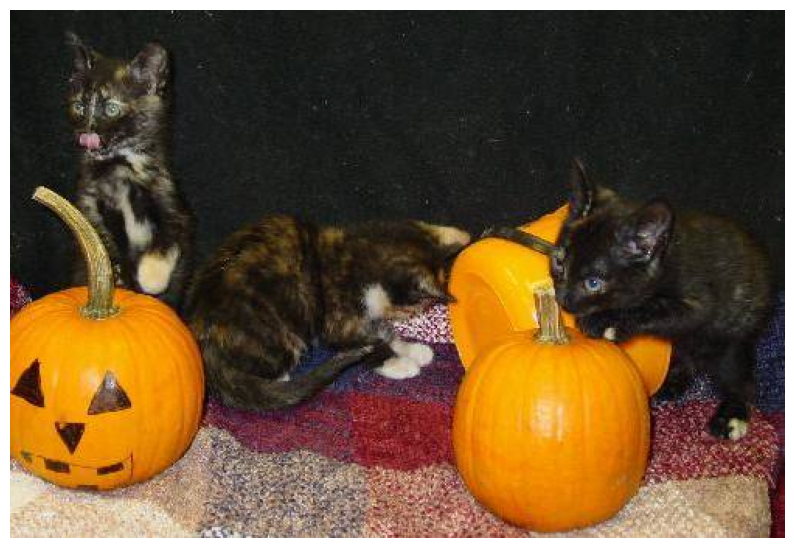

In [62]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img1)
plt.show()

In [66]:
import torch
import pandas

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = '/content/train/cat.824.jpg'

# Inference
results = model(img)

results.pandas().xyxy[0]


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-17 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,343.767273,100.849739,496.508057,275.612640,0.581682,15,cat
1,112.339233,130.968445,301.043854,256.931274,0.549959,15,cat
2,29.989206,13.234713,120.182549,191.187012,0.419507,15,cat


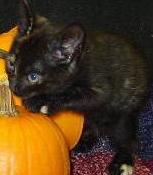

In [72]:
import PIL
image_path = '/content/train/cat.824.jpg'
image = np.array(Image.open(image_path))

# Belirlenen bölgenin sınırlarını tanımlayın
x_min, x_max, y_min, y_max = 342, 495, 99, 274

# Belirlenen bölgeyi alın
cropped_image = image[y_min:y_max, x_min:x_max]

# Oluşturulan alt resmi görselleştir

PIL.Image.fromarray(cropped_image)